# Laboratorio 2 | Deep Learning 

In [11]:
# Renatto Esteban Guzmán Sosa 21646
# Jennifer Michelle Toxcón Ordoñez 21276

In [2]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [6]:
# # Pasar data de csv a pickle

# df = pd.read_csv('movie_statistic_dataset.csv')

# with open("movie_statistic_dataset.pkl", "wb") as file:
#     pickle.dump(df, file)

In [3]:
# Cargar data con archivo pickle

with open("movie_statistic_dataset.pkl", "rb") as file:
    df = pickle.load(file)

df.head(5)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [4]:
df = df.replace('-', np.nan)

# Luego, eliminar las filas con NaN
#df = df.dropna()

df = df.drop(columns=['movie_title', 'director_professions', 'director_birthYear', 'director_deathYear'])

df

,production_date,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,2019-04-23,"Action,Adventure,Drama",181.0,NaN,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,2018-04-25,"Action,Adventure,Sci-Fi",149.0,NaN,8.4,1091968.0,8.460958,300000000,678815482,2048359754
...,...,...,...,...,...,...,...,...,...,...
4375,2004-05-07,Documentary,100.0,Morgan Spurlock,7.2,110078.0,6.017902,65000,11529368,22233808
4376,1995-08-09,"Comedy,Drama,Romance",98.0,Edward Burns,6.6,7986.0,4.231464,50000,10426506,10426506
4377,2001-03-16,"Drama,Romance",93.0,Vincent Jay Miller,4.9,1593.0,2.526405,50000,2335352,2335352
4378,2010-11-12,"Comedy,Drama,Romance",98.0,Lena Dunham,6.2,14595.0,4.242085,50000,391674,424149


In [5]:

data = df

scaler = MinMaxScaler(feature_range=(-1, 1))

data['N-movie_averageRating'] = scaler.fit_transform(df[['movie_averageRating']])

data['N-movie_numerOfVotes'] = scaler.fit_transform(df[['movie_numerOfVotes']])

data['N-approval_Index'] = scaler.fit_transform(df[['approval_Index']])

data['N-Production budget'] = scaler.fit_transform(df[['Production budget $']])

data['N-Domestic gross'] = scaler.fit_transform(df[['Domestic gross $']])

data['N-Worldwide gross'] = scaler.fit_transform(df[['Worldwide gross $']])

data['production_year'] = pd.to_datetime(data['production_date']).dt.year

data['N-production_year'] = scaler.fit_transform(data[['production_year']])



data = df.drop(columns=['movie_averageRating','movie_numerOfVotes','approval_Index','Production budget $','Domestic gross $','Worldwide gross $', \
                        'production_date','production_year'])

columns_to_rename = [col for col in data.columns if col.startswith('N-')]

# Crear un diccionario de mapeo para renombrar
rename_dict = {col: col[2:] for col in columns_to_rename}

# Renombrar las columnas
data = data.rename(columns=rename_dict)


data

,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget,Domestic gross,Worldwide gross,production_year
0,"Action,Adventure,Fantasy",192.0,James Cameron,0.615385,-0.794102,0.388017,1.000000,0.556037,0.550043,0.981481
1,"Action,Adventure,Drama",181.0,NaN,0.769231,-0.151567,0.685467,0.739102,1.000000,0.911773,0.925926
2,"Action,Adventure,Fantasy",137.0,Rob Marshall,0.307692,-0.604020,0.223712,0.647788,-0.438306,-0.284666,0.777778
3,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,0.487179,-0.354150,0.419859,0.586912,0.069479,-0.045515,0.851852
4,"Action,Adventure,Sci-Fi",149.0,NaN,0.769231,-0.189903,0.679517,0.304272,0.581633,0.401208,0.907407
...,...,...,...,...,...,...,...,...,...,...
4375,Documentary,100.0,Morgan Spurlock,0.461538,-0.918340,0.170786,-0.999935,-0.973137,-0.984791,0.648148
4376,"Comedy,Drama,Romance",98.0,Edward Burns,0.307692,-0.994079,-0.201214,-1.000000,-0.975707,-0.992868,0.481481
4377,"Drama,Romance",93.0,Vincent Jay Miller,-0.128205,-0.998822,-0.556267,-1.000000,-0.994559,-0.998403,0.592593
4378,"Comedy,Drama,Romance",98.0,Lena Dunham,0.205128,-0.989176,-0.199002,-1.000000,-0.999088,-0.999710,0.759259


In [6]:
# Paso 1: Separar los géneros
data['genres_list'] = data['genres'].str.split(',')

# Paso 2: Usar get_dummies
genres_dummies = data['genres_list'].explode().str.get_dummies().groupby(level=0).max()

# Paso 3: Unir las nuevas columnas dummy al DataFrame original
data = pd.concat([data, genres_dummies], axis=1)

# Paso 4: Eliminar la columna original de géneros y la columna de lista si ya no las necesitas
data = data.drop(['genres', 'genres_list', "\\N"], axis=1)

# Visualizar las primeras filas para verificar
print(data.head())


   runtime_minutes  director_name  movie_averageRating  movie_numerOfVotes  \
0            192.0  James Cameron             0.615385           -0.794102   
1            181.0            NaN             0.769231           -0.151567   
2            137.0   Rob Marshall             0.307692           -0.604020   
3            141.0    Joss Whedon             0.487179           -0.354150   
4            149.0            NaN             0.769231           -0.189903   

   approval_Index  Production budget  Domestic gross  Worldwide gross  \
0        0.388017           1.000000        0.556037         0.550043   
1        0.685467           0.739102        1.000000         0.911773   
2        0.223712           0.647788       -0.438306        -0.284666   
3        0.419859           0.586912        0.069479        -0.045515   
4        0.679517           0.304272        0.581633         0.401208   

   production_year  Action  ...  Music  Musical  Mystery  News  Romance  \
0         0.98148

In [7]:
# Data without info from directors
nd_data = data

nd_data = nd_data.drop(columns=['director_name'])

nd_data

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget,Domestic gross,Worldwide gross,production_year,Action,Adventure,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,192.0,0.615385,-0.794102,0.388017,1.000000,0.556037,0.550043,0.981481,1,1,...,0,0,0,0,0,0,0,0,0,0
1,181.0,0.769231,-0.151567,0.685467,0.739102,1.000000,0.911773,0.925926,1,1,...,0,0,0,0,0,0,0,0,0,0
2,137.0,0.307692,-0.604020,0.223712,0.647788,-0.438306,-0.284666,0.777778,1,1,...,0,0,0,0,0,0,0,0,0,0
3,141.0,0.487179,-0.354150,0.419859,0.586912,0.069479,-0.045515,0.851852,1,1,...,0,0,0,0,0,1,0,0,0,0
4,149.0,0.769231,-0.189903,0.679517,0.304272,0.581633,0.401208,0.907407,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,100.0,0.461538,-0.918340,0.170786,-0.999935,-0.973137,-0.984791,0.648148,0,0,...,0,0,0,0,0,0,0,0,0,0
4376,98.0,0.307692,-0.994079,-0.201214,-1.000000,-0.975707,-0.992868,0.481481,0,0,...,0,0,0,0,1,0,0,0,0,0
4377,93.0,-0.128205,-0.998822,-0.556267,-1.000000,-0.994559,-0.998403,0.592593,0,0,...,0,0,0,0,1,0,0,0,0,0
4378,98.0,0.205128,-0.989176,-0.199002,-1.000000,-0.999088,-0.999710,0.759259,0,0,...,0,0,0,0,1,0,0,0,0,0


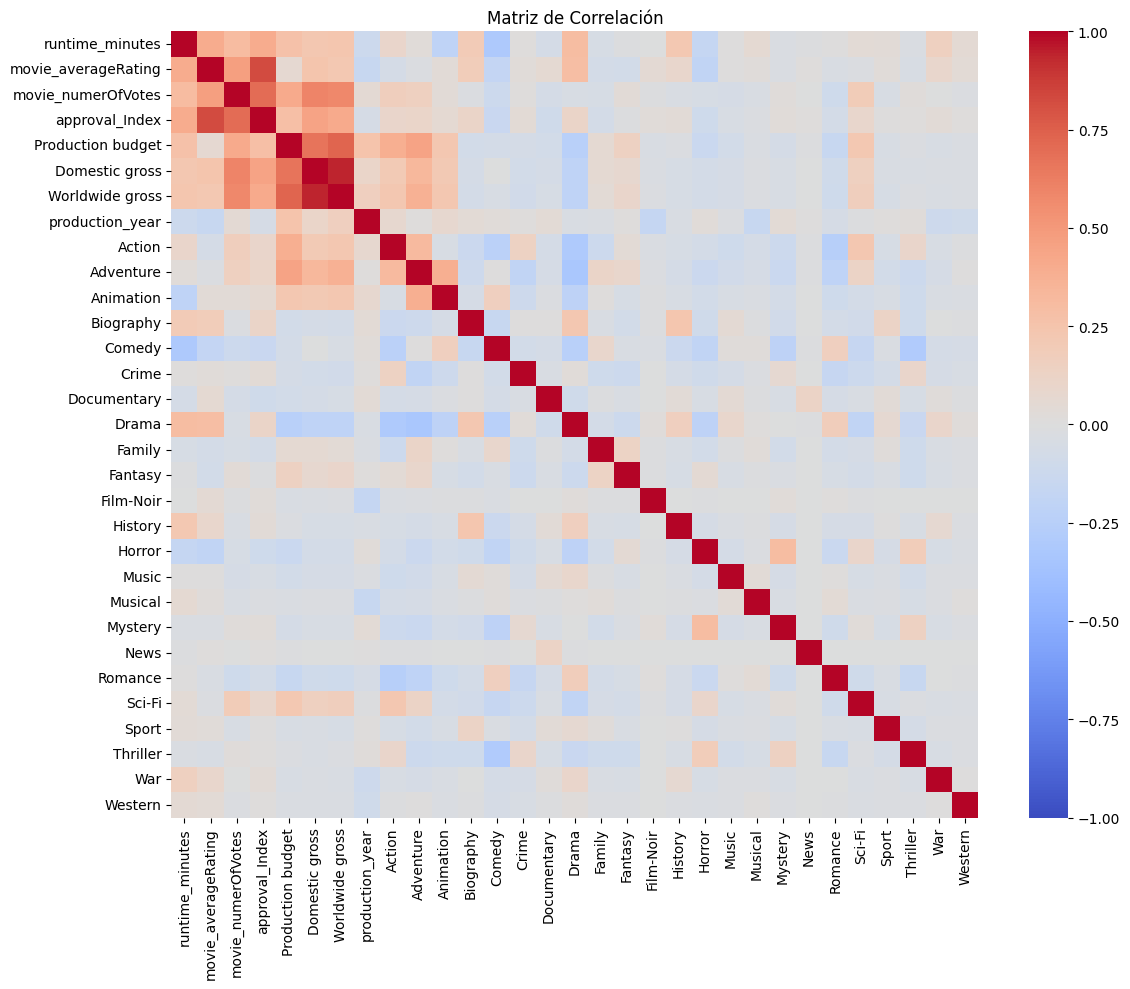

In [8]:
correlation = nd_data.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el heatmap
sns.heatmap(correlation, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Configurar el título
plt.title('Matriz de Correlación')

# Ajustar la disposición
plt.tight_layout()

# Mostrar el plot
plt.show()


In [9]:
print(nd_data.value_counts())    



runtime_minutes  movie_averageRating  movie_numerOfVotes  approval_Index  Production budget  Domestic gross  Worldwide gross  production_year  Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  Family  Fantasy  Film-Noir  History  Horror  Music  Musical  Mystery  News  Romance  Sci-Fi  Sport  Thriller  War  Western
63.0              0.435897            -0.980651           -0.003619       -0.869768          -0.937807       -0.965698        0.777778         0       1          1          0          1       0      0            0      0       0        0          0        0       0      0        0        0     0        0       0      0         0    0          1
115.0            -0.076923            -0.996383           -0.446198       -0.826285          -0.983691       -0.995212        0.203704         1       1          0          0          0       0      0            1      0       0        0          0        0       0      0        0        0     0        0      

In [10]:
# X = df[['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 
#         'Production budget $'] + 
#        [col for col in df.columns if col.startswith('genres_')]]

X = nd_data[["runtime_minutes", "movie_averageRating", "movie_numerOfVotes", "approval_Index", "Production budget", \
        "production_year", "Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy", \
        "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery", "News", "Romance", "Sci-Fi", "Sport", "Thriller", "War", "Western"]]

y = nd_data[["Domestic gross", "Worldwide gross"]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20,
  random_state=42
)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NameError: name 'StandardScaler' is not defined

In [13]:
len(X.columns)

29

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2


In [23]:
model = Sequential([
    Dense(64, input_shape=(29,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer='adam', 
    loss='mse', metrics=['accuracy'], 
    run_eagerly=True
)


c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model_history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_split=0.2, verbose=2)


Epoch 1/200
71/71 - 5s - 69ms/step - accuracy: 0.7249 - loss: 2.1137 - val_accuracy: 0.9058 - val_loss: 1.9964
Epoch 2/200
71/71 - 4s - 63ms/step - accuracy: 0.7702 - loss: 1.9880 - val_accuracy: 0.9058 - val_loss: 1.9968
Epoch 3/200
71/71 - 4s - 61ms/step - accuracy: 0.7435 - loss: 1.9881 - val_accuracy: 0.0956 - val_loss: 1.9978
Epoch 4/200
71/71 - 4s - 59ms/step - accuracy: 0.7257 - loss: 1.9881 - val_accuracy: 0.9058 - val_loss: 1.9964
Epoch 5/200
71/71 - 4s - 60ms/step - accuracy: 0.6547 - loss: 1.9883 - val_accuracy: 0.9058 - val_loss: 1.9962
Epoch 6/200
71/71 - 4s - 63ms/step - accuracy: 0.7299 - loss: 1.9880 - val_accuracy: 0.9058 - val_loss: 1.9963
Epoch 7/200
71/71 - 4s - 61ms/step - accuracy: 0.7574 - loss: 1.9879 - val_accuracy: 0.8887 - val_loss: 1.9962
Epoch 8/200
71/71 - 4s - 62ms/step - accuracy: 0.8102 - loss: 1.9877 - val_accuracy: 0.3338 - val_loss: 1.9969
Epoch 9/200
71/71 - 4s - 60ms/step - accuracy: 0.6796 - loss: 1.9886 - val_accuracy: 0.8203 - val_loss: 1.9963
E

In [35]:
model2 = Sequential([
    Dense(128, activation='tanh', input_shape=(29,), kernel_regularizer=l2(0.01)),
    Dense(64, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(32, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(2)
])

model2.compile(
    optimizer='adam', 
    loss='mse',
    metrics=['accuracy'], 
    run_eagerly=True
)


c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model_history2 = model2.fit(X_train, y_train, epochs=200, batch_size=40, validation_split=0.2, verbose=2)

Epoch 1/200
71/71 - 4s - 51ms/step - accuracy: 0.7403 - loss: 1.5700 - val_accuracy: 0.9058 - val_loss: 1.2591
Epoch 2/200
71/71 - 4s - 50ms/step - accuracy: 0.8816 - loss: 1.0916 - val_accuracy: 0.9058 - val_loss: 0.9352
Epoch 3/200
71/71 - 4s - 50ms/step - accuracy: 0.8248 - loss: 0.8294 - val_accuracy: 0.9058 - val_loss: 0.7270
Epoch 4/200
71/71 - 3s - 47ms/step - accuracy: 0.7467 - loss: 0.6515 - val_accuracy: 0.6562 - val_loss: 0.5740
Epoch 5/200
71/71 - 4s - 50ms/step - accuracy: 0.6871 - loss: 0.5208 - val_accuracy: 0.8645 - val_loss: 0.4598
Epoch 6/200
71/71 - 4s - 50ms/step - accuracy: 0.8056 - loss: 0.4174 - val_accuracy: 0.9058 - val_loss: 0.3708
Epoch 7/200
71/71 - 3s - 48ms/step - accuracy: 0.8230 - loss: 0.3386 - val_accuracy: 0.9058 - val_loss: 0.3021
Epoch 8/200
71/71 - 4s - 52ms/step - accuracy: 0.8609 - loss: 0.2740 - val_accuracy: 0.8930 - val_loss: 0.2535
Epoch 9/200
71/71 - 4s - 55ms/step - accuracy: 0.8601 - loss: 0.2251 - val_accuracy: 0.9058 - val_loss: 0.1998
E

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

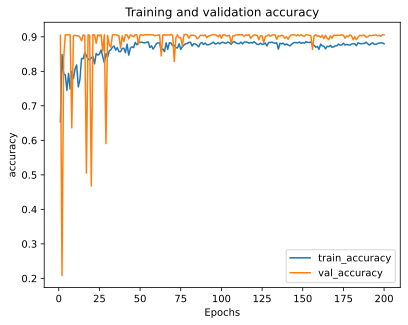

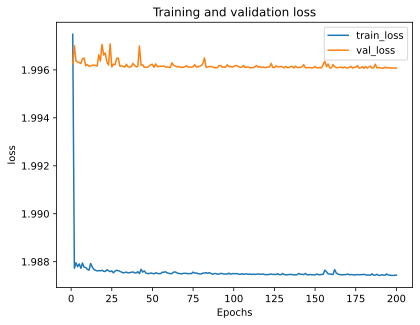

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


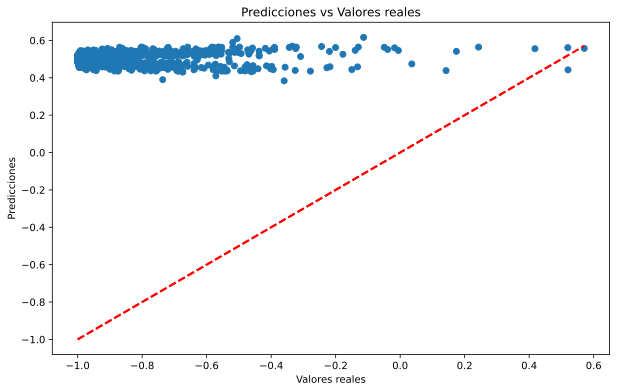

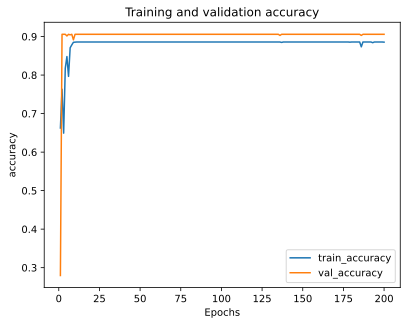

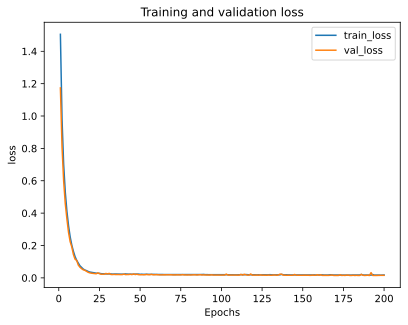

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


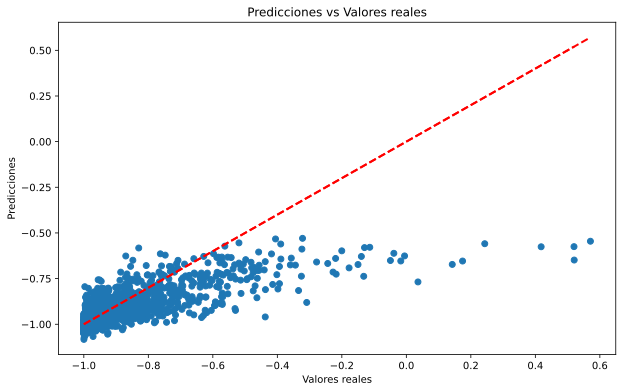

In [73]:

plot_metric(model_history, 'accuracy')
plot_metric(model_history, 'loss')

y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

plot_metric(model_history2, 'accuracy')
plot_metric(model_history2, 'loss')

y_pred = model2.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()


In [37]:
# Evaluación del modelo en el conjunto de prueba
scores = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1]:.4f}, Test Loss: {scores[0]:.4f}")


Test Accuracy: 0.8858, Test Loss: 0.0178


### Objetivo

Una red neuronal puede aprender a identificar patrones complejos y sutilezas en los datos que modelos más simples podrían pasar por alto.


## Discusión

La Precisión del 88.58% es una cifra decente, pero dependiendo del contexto del problema, puede ser necesario alcanzar una precisión más alta. Por ejemplo en este caso, aprobación y ganancias entre las películas. Así mismo combinada con una pérdida significativamente más baja de 0.0178 presenta un escenario diferente y más prometedor. 

Una pérdida tan baja indica que las predicciones del modelo están muy cerca de las etiquetas reales en promedio, lo que es un buen indicador de que el modelo está aprendiendo efectivamente de los datos de entrenamiento. La baja pérdida sugiere que el modelo está bien ajustado en términos de cómo maneja la función de pérdida durante el entrenamiento.

Se puede notar que no hay sobreajuste


Consta de capas densas con activaciones 'relu', seguidas de capas de 'softmax' para clasificación, ajustadas para minimizar el error cuadrático medio (MSE). Este modelo alcanzó una precisión de aproximadamente 88.58% con una pérdida de 1.9586 inicialmente, y luego una pérdida significativamente más baja de 0.0178.


### Modelo No. 2

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

In [25]:
model3 = Sequential([
    Dense(100, activation='relu', input_shape=(29,), kernel_regularizer=l2(0.01)),  
    BatchNormalization(),
    Dropout(0.3),
    Dense(150, activation='sigmoid'), 
    BatchNormalization(),
    Dropout(0.3),
    Dense(50, activation='relu'), 
    Dense(25, activation='relu'), 
    Dense(2, activation='softmax') 
])


In [26]:
# Compilación 
model3.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['accuracy']
)


In [27]:
# Entrenamiento
model_history3 = model3.fit(X_train, y_train, epochs=200, batch_size=40, validation_split=0.2, verbose=2)

Epoch 1/200
71/71 - 3s - 37ms/step - accuracy: 0.5851 - loss: 2.2897 - val_accuracy: 0.9016 - val_loss: 2.1562
Epoch 2/200
71/71 - 0s - 3ms/step - accuracy: 0.6329 - loss: 2.0870 - val_accuracy: 0.9058 - val_loss: 2.0451
Epoch 3/200
71/71 - 0s - 2ms/step - accuracy: 0.6960 - loss: 2.0171 - val_accuracy: 0.9058 - val_loss: 2.0108
Epoch 4/200
71/71 - 0s - 3ms/step - accuracy: 0.7510 - loss: 1.9957 - val_accuracy: 0.9058 - val_loss: 1.9995
Epoch 5/200
71/71 - 0s - 2ms/step - accuracy: 0.7902 - loss: 1.9898 - val_accuracy: 0.9058 - val_loss: 1.9970
Epoch 6/200
71/71 - 0s - 3ms/step - accuracy: 0.8081 - loss: 1.9883 - val_accuracy: 0.8987 - val_loss: 1.9965
Epoch 7/200
71/71 - 0s - 2ms/step - accuracy: 0.8327 - loss: 1.9880 - val_accuracy: 0.8345 - val_loss: 1.9969
Epoch 8/200
71/71 - 0s - 3ms/step - accuracy: 0.8416 - loss: 1.9879 - val_accuracy: 0.8830 - val_loss: 1.9965
Epoch 9/200
71/71 - 0s - 3ms/step - accuracy: 0.8387 - loss: 1.9888 - val_accuracy: 0.4451 - val_loss: 1.9978
Epoch 10/

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

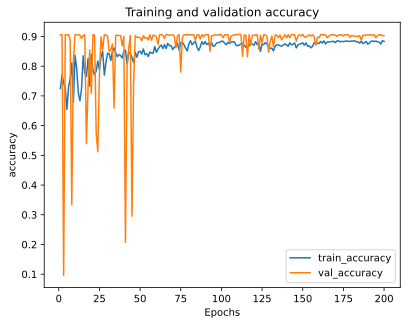

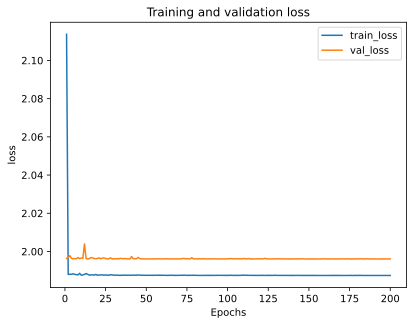

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


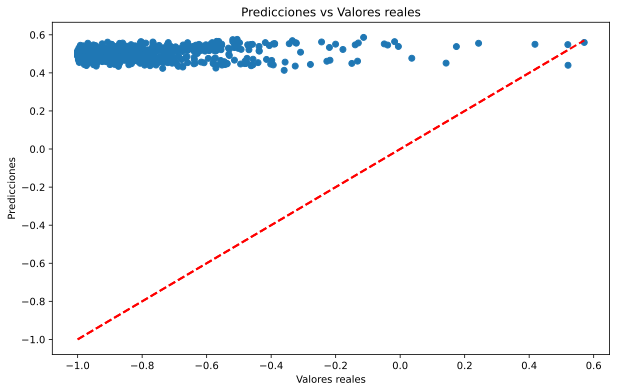

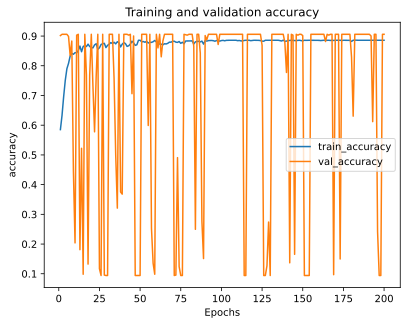

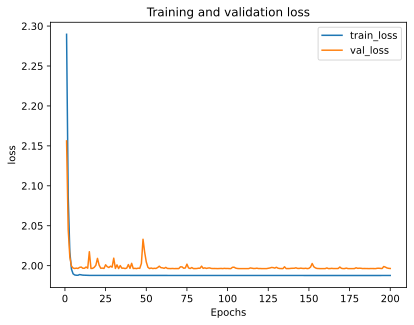

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


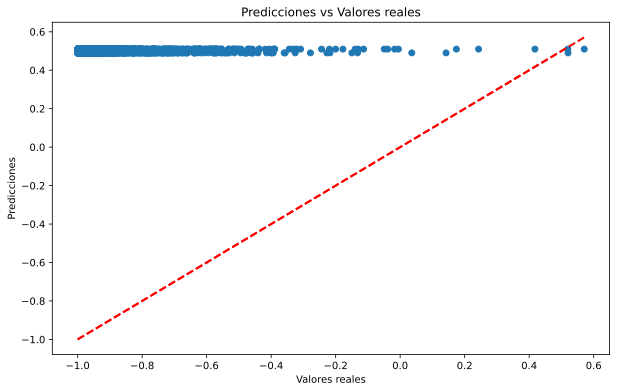

In [29]:
plot_metric(model_history, 'accuracy')
plot_metric(model_history, 'loss')

y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

plot_metric(model_history3, 'accuracy')
plot_metric(model_history3, 'loss')

y_pred = model3.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()


In [33]:
# Evaluación del modelo en el conjunto de prueba
scores = model3.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1]:.4f}, Test Loss: {scores[0]:.4f}")



Test Accuracy: 0.8858, Test Loss: 1.9586


88.58% es una cifra decente, pero puede ser necesario alcanzar una precisión más alta. La precisión indica qué porcentaje de las predicciones totales fueron correctas.

La pérdida de 1.9586 relativamente alta indica que las predicciones del modelo están bastante lejos de las etiquetas reales. El modelo tiene problemas con la forma en que está aprendiendo, el ajuste de la función de pérdida y la escala de las entradas y salidas.

## Diferencias

 El primer modelo usa 'relu' y 'softmax', ideal para problemas de clasificación, mientras que el segundo emplea 'tanh', que es menos común en las últimas capas de modelos de clasificación debido a su rango de salida (-1, 1), pero puede ser efectivo en la regularización del modelo.

El modelo 1 tuvo un amplio rango de pérdida en sus evaluaciones, lo que sugiere una posible variabilidad en cómo el modelo se ajusta a los datos o  errores en la configuración de la función de pérdida o en la interpretación de los resultados como un problema de clasificación.